In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 웹스크래핑한 데이터 불러오기
* hitter_team( 타자2.xlsx ) : 연도별 구단성적 중 타자의 자료(변수 28개, 166건의 데이터)
* hitter(타자 _ 2002 _ 2020.xlsx ) : 연도별 선수 개개인의 자료(변수 28개, 888건의 데이터)

In [2]:
hitter_team = pd.read_excel("타자2.xlsx")
hitter = pd.read_excel("타자_2002-2020.xlsx")

In [3]:
hitter_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 165
Data columns (total 28 columns):
연도          166 non-null int64
순위          166 non-null int64
팀명          166 non-null object
타율          166 non-null float64
경기          166 non-null int64
타석          166 non-null int64
타수          166 non-null int64
득점          166 non-null int64
안타          166 non-null int64
2루타         166 non-null int64
3루타         166 non-null int64
홈런          166 non-null int64
루타          166 non-null int64
타점          166 non-null int64
희생번트        166 non-null int64
희생플라이       166 non-null int64
볼넷          166 non-null int64
고의4구        166 non-null int64
사구          166 non-null int64
삼진          166 non-null int64
병살타         166 non-null int64
장타율         166 non-null float64
출루율         166 non-null float64
출루율+장타율     166 non-null float64
멀티히트        166 non-null int64
득점권타율       166 non-null float64
대타타율        166 non-null float64
순위_total    166 non-null int64
dtypes: float6

### 구단별 타자데이터 확인

#### 구단별 타자 데이터 전처리
* 연도, 순위, 순위_total 컬럼의 타입변경 (int => category) 
* 현대,우리,(서울)히어로즈, 넥센, 키움 => 히어로즈로 통합
* 순위 컬럼 level 조정 (??)

In [4]:
hitter_team['연도'] = hitter_team['연도'].astype('category')
hitter_team['순위'] = hitter_team['순위'].astype('category')
hitter_team['순위_total'] = hitter_team['순위_total'].astype('category')

In [5]:
hitter_team.loc[hitter_team['팀명'] == '현대', '팀명'] = '히어로즈'
hitter_team.loc[hitter_team['팀명'] == '우리', '팀명'] = '히어로즈'
hitter_team.loc[hitter_team['팀명'] == '넥센', '팀명'] = '히어로즈'
hitter_team.loc[hitter_team['팀명'] == '키움', '팀명'] = '히어로즈'

In [6]:
hitter_team['팀명'].unique()

array(['삼성', 'SK', 'KIA', 'LG', '히어로즈', '두산', '한화', '롯데', 'NC', 'KT'],
      dtype=object)

In [7]:
hitter_team.describe()

,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.271837,127.819277,4983.783133,4348.831325,621.975904,1184.506024,207.427711,18.891566,114.873494,1774.337349,...,16.548193,72.349398,836.469880,100.644578,0.407084,0.347205,0.754289,127.475904,0.274030,0.224054
std,0.015296,27.384643,1081.953509,948.965042,167.038589,278.976283,52.514623,8.015155,44.831154,445.437103,...,7.014753,23.017481,212.893818,25.385277,0.036964,0.015990,0.050272,27.323805,0.020824,0.046209
min,0.242000,23.000000,879.000000,778.000000,86.000000,189.000000,28.000000,0.000000,15.000000,276.000000,...,0.000000,8.000000,142.000000,12.000000,0.347000,0.305000,0.656000,23.000000,0.224000,0.059000
25%,0.260000,126.500000,4941.000000,4291.750000,550.000000,1118.500000,190.250000,14.000000,88.000000,1610.000000,...,12.000000,60.250000,763.500000,92.000000,0.377250,0.337000,0.716250,126.250000,0.261000,0.197250
50%,0.271000,133.000000,5147.500000,4458.500000,634.500000,1212.000000,212.000000,19.000000,113.500000,1832.500000,...,16.500000,74.000000,864.000000,105.000000,0.404000,0.348000,0.754500,133.000000,0.272500,0.221000
75%,0.283750,144.000000,5538.250000,4917.500000,727.500000,1329.250000,235.750000,23.750000,144.500000,1995.750000,...,21.000000,86.750000,961.500000,116.750000,0.433750,0.358000,0.792000,143.000000,0.286750,0.254000
max,0.309000,144.000000,5870.000000,5176.000000,944.000000,1601.000000,304.000000,39.000000,234.000000,2518.000000,...,38.000000,130.000000,1208.000000,146.000000,0.509000,0.382000,0.891000,144.000000,0.338000,0.367000


In [8]:
hitter_team.head()

,연도,순위,팀명,타율,경기,타석,타수,득점,안타,2루타,...,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율,순위_total
0,2002,1,삼성,0.284,133,5304,4648,777,1321,266,...,97,804,116,0.472,0.360,0.832,133,0.278,0.165,1
1,2002,2,SK,0.270,133,5090,4475,618,1207,204,...,100,815,94,0.433,0.339,0.772,133,0.271,0.218,6
2,2002,3,KIA,0.269,133,5200,4575,643,1230,220,...,91,914,107,0.402,0.344,0.746,133,0.268,0.250,3
3,2002,4,LG,0.261,133,5121,4492,583,1173,212,...,86,951,91,0.385,0.332,0.717,133,0.258,0.178,2
4,2002,5,히어로즈,0.261,133,5140,4444,658,1160,191,...,99,945,82,0.432,0.342,0.774,133,0.270,0.209,4


### 구단별타자의 데이터 중 유의미한 변수의 값을 확인
* 타율 : 안타/타수로 계산되며 타자평가의 주요한 스탯
* 장타율 : 한 타자가 한 타석에 들어갔을 때 얻어낼 수 있는 평균베이스의 수(1루타+2루타*2+3루타*3+홈런*4)
* 출루율 : 타석에 들어가서 베이스로 살아나가는 확률(안타+볼넷+몸맞는공)
* 득점권타율 : 주자가 2루 이상 있을 때의 타율로 즉 찬스에 강한 타자를 구분

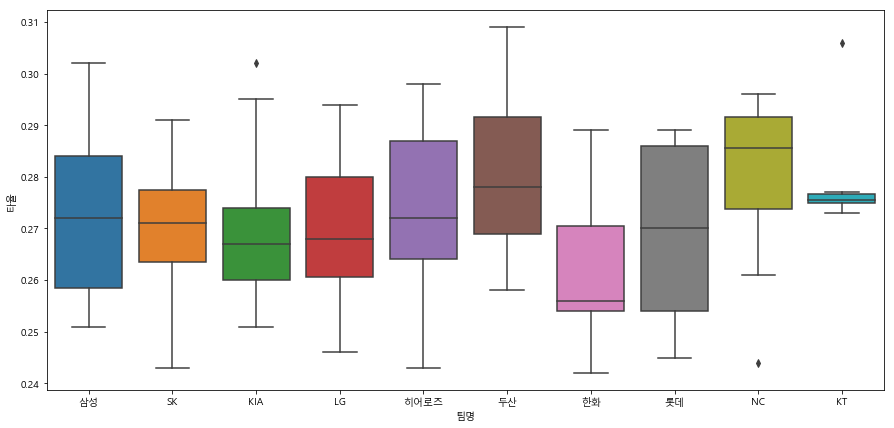

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
sns.boxplot(x='팀명', y='타율', data = hitter_team)

##### 구단별 타율의 박스플롯  의미
* 구단별  타율의 중위값을  확인해 보면  두산이  우위를 차지, 사분위 분포도 중위값 이상이  다수를 차지 하는 것을 볼 수 있다.
   -->안정적 우승팀이라는 것이 타율로 확인 가능하다.
* 한화의 경우 중위값이 타 팀과 비교했을 때 매우 낮다. --> 1999년 이후 영광의 순간이 없는 이유를 알 수있다.
* kt의 경우 2015년 KBO리그에 합류, 데이터가 적어 분산이 적기때문에 박스 크기가 작다. 단 타율이 9개구단중 상위권에 속한다.
  --> 그럼에도 항상 순위가 낮은것은 투수데이터와 합쳤을 때 타격은 양호하나 수비가 좋지 않기 때문으로 확인된다.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


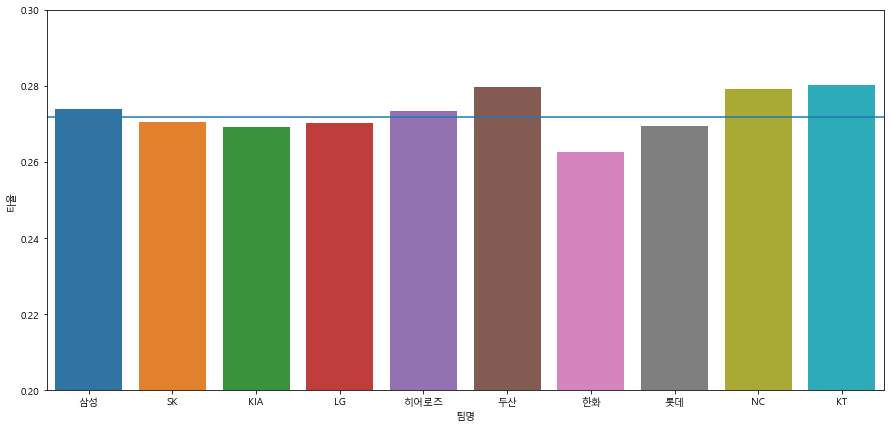

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
graph = sns.barplot(x='팀명', y='타율', data = hitter_team, ci=False)
plt.ylim(0.2,0.3)
graph.axhline(0.271837)
plt.show()

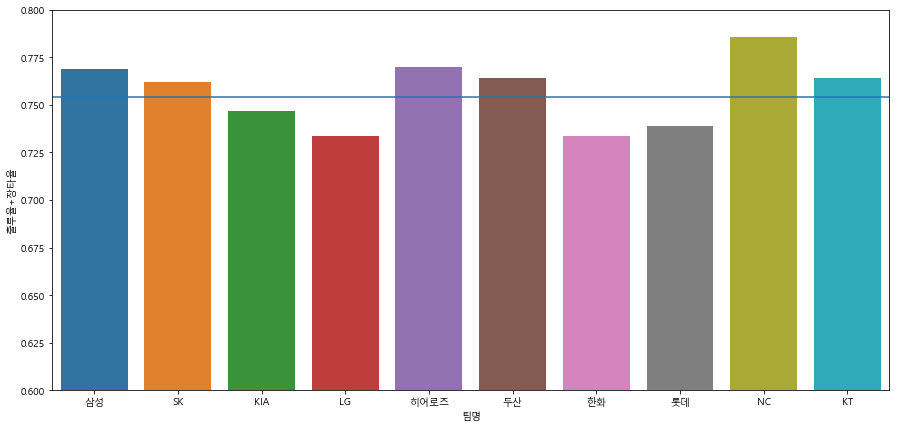

In [11]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
graph = sns.barplot(x='팀명', y='출루율+장타율', data = hitter_team, ci=False)
plt.ylim(0.6,0.8)
graph.axhline(0.754289)
plt.show()

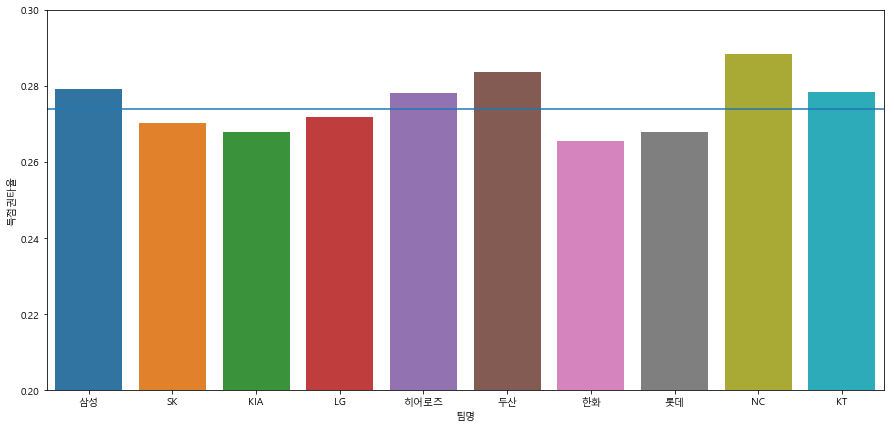

In [12]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
graph = sns.barplot(x='팀명', y='득점권타율', data = hitter_team, ci=False)
plt.ylim(0.2,0.3)
graph.axhline(0.274030)
plt.show()

#### 구단별 타율, 출루율+장타율, 득점권타율을 비교한 결과
* 3가지 모두 평균 이상인 구단 : 삼성,히어로즈,두산,NC,KT
* 3가지 모두 평균 이하인 구단 : KIA,LG,한화,롯데,SK(SK는 OPS만 평균이상)
* 정규리그 상위권 구단과 타율, OPS, 득점권 타율 이 월등히 높다. 특히 NC와 두산의 득점권타율
* 의문 : SK와 KT

In [13]:
hitter_team['타율'].mean()

0.27183734939759013

### 선수별 타자데이터
* 235명 선수의 연도/구단 구분된 데이터 (888건)

In [10]:
hitter = pd.read_excel("타자_2002-2020.xlsx")

In [11]:
hitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 28 columns):
연도         888 non-null int64
순위         888 non-null int64
선수명        888 non-null object
팀명         888 non-null object
타율         888 non-null float64
경기         888 non-null int64
타석         888 non-null int64
타수         888 non-null int64
득점         888 non-null int64
안타         888 non-null int64
2루타        888 non-null int64
3루타        888 non-null int64
홈런         888 non-null int64
루타         888 non-null int64
타점         888 non-null int64
희생번트       888 non-null int64
희생플라이      888 non-null int64
볼넷         888 non-null int64
고의4구       888 non-null int64
사구         888 non-null int64
삼진         888 non-null int64
병살타        888 non-null int64
장타율        888 non-null float64
출루율        888 non-null float64
출루율+장타율    888 non-null float64
멀티히트       888 non-null int64
득점권타율      888 non-null float64
대타타율       888 non-null float64
dtypes: float64(6), int64(20), object(2)


In [19]:
hitter['연도'] = hitter['연도'].astype('category')
hitter['순위'] = hitter['순위'].astype('category')

In [20]:
hitter.loc[hitter['팀명'] == '현대', '팀명'] = '히어로즈'
hitter.loc[hitter['팀명'] == '우리', '팀명'] = '히어로즈'
hitter.loc[hitter['팀명'] == '넥센', '팀명'] = '히어로즈'
hitter.loc[hitter['팀명'] == '키움', '팀명'] = '히어로즈'

In [21]:
hitter.tail()

,연도,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
883,2020,56,오지환,LG,0.208,22,81,72,11,15,...,0,1,24,0,0.403,0.263,0.666,2,0.133,0.0
884,2020,57,최원준,KIA,0.203,22,85,69,3,14,...,0,1,10,0,0.232,0.280,0.512,2,0.067,0.0
885,2020,58,유강남,LG,0.200,21,69,60,6,12,...,1,3,13,2,0.333,0.290,0.623,2,0.214,0.5
886,2020,59,최정,SK,0.197,22,90,71,13,14,...,0,4,15,1,0.352,0.367,0.719,5,0.353,0.0
887,2020,60,박건우,두산,0.190,22,91,79,15,15,...,1,3,11,2,0.304,0.286,0.590,1,0.083,0.0


In [22]:
hitter.describe()

,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,루타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,...,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.293099,117.317568,475.132883,412.813063,64.208333,121.620495,21.490991,1.916667,13.626126,187.823198,...,2.246622,6.679054,70.717342,9.511261,0.451694,0.370177,0.821870,33.298423,0.298840,0.211172
std,0.031926,27.514359,119.462864,104.441106,23.273930,35.242998,8.148836,2.209397,10.136157,62.860372,...,2.716393,4.796834,27.553700,4.700726,0.083904,0.037447,0.112327,11.568234,0.056222,0.282032
min,0.190000,17.000000,68.000000,56.000000,3.000000,12.000000,0.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,3.000000,0.000000,0.232000,0.244000,0.512000,1.000000,0.067000,0.000000
25%,0.272750,116.000000,449.000000,386.000000,51.000000,108.000000,16.000000,0.000000,5.000000,157.000000,...,0.000000,3.000000,54.000000,6.000000,0.391000,0.346750,0.745750,27.000000,0.263000,0.000000
50%,0.291500,124.000000,493.000000,428.000000,64.000000,124.000000,21.000000,1.000000,12.000000,189.000000,...,1.000000,6.000000,69.000000,9.000000,0.445000,0.368000,0.813000,33.000000,0.298000,0.000000
75%,0.313000,131.000000,540.000000,473.000000,79.000000,142.000000,26.250000,3.000000,20.000000,225.000000,...,3.000000,9.000000,88.000000,13.000000,0.503000,0.394000,0.889000,41.000000,0.333000,0.333000
max,0.472000,144.000000,672.000000,600.000000,135.000000,201.000000,47.000000,17.000000,56.000000,377.000000,...,25.000000,27.000000,161.000000,24.000000,0.808000,0.505000,1.287000,67.000000,0.579000,1.000000


#### 타자 개인 데이터 중 유의미한 변수의 값을 확인
* 타율 : 안타/타수로 계산되며 타자평가의 주요한 스탯
* 장타율 : 한 타자가 한 타석에 들어갔을 때 얻어낼 수 있는 평균베이스의 수(1루타+2루타2+3루타3+홈런*4) - 득점력 지표
* 출루율 : 타석에 들어가서 베이스로 살아나가는 확률(안타+볼넷+몸맞는공) - 득점력 지표
* OPS : 장타율 + 출루율
* 득점권타율 : 주자가 2루 이상 있을 때의 타율로 즉 찬스에 강한 타자를 구분 - 찬스

#### 참고 메이저리그 OPS기준(세이버메트릭스 전문가들 마다 다소의 차이가 있다.)
* 1.0 : Excellent(MVP급 매우우수)
* 0.9 : Great(우수)
* 0.8 : Above Average(평균이상)
* 0.73 : Average(평균)
* 0.7 : Belowaverage(평균이하)
* 0.6 : Poor(부족함)
* 0.55 : Awful, Atrocious(형편없음)

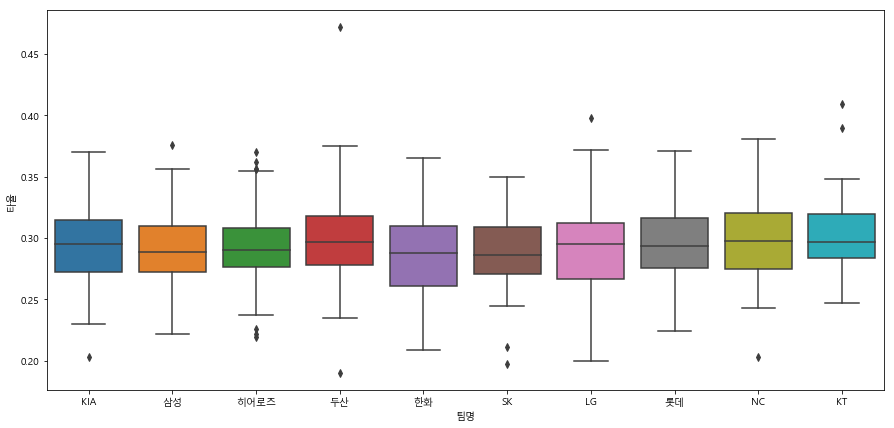

In [25]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,7))
sns.boxplot(x='팀명', y='타율', data = hitter)

In [26]:
hitter.columns

Index(['연도', '순위', '선수명', '팀명', '타율', '경기', '타석', '타수', '득점', '안타', '2루타',
       '3루타', '홈런', '루타', '타점', '희생번트', '희생플라이', '볼넷', '고의4구', '사구', '삼진',
       '병살타', '장타율', '출루율', '출루율+장타율', '멀티히트', '득점권타율', '대타타율'],
      dtype='object')

In [27]:
hitter['선수명'].unique()

array(['장성호', '마해영', '이승엽', '심정수', '김동주', '이영우', '김한수', '이진영', '전준호',
       '이병규', '이종범', '송지만', '채종범', '홍성흔', '이호준', '안경현', '박용택', '강동우',
       '데이비스', '김종국', '최기문', '이숭용', '김응국', '브리또', '진갑용', '페르난데스', '폴',
       '마르티네스', '박재홍', '양준혁', '장원진', '박한이', '박종호', '김민재', '홍세완', '우즈',
       '심재학', '정수근', '임수민', '박진만', '김태균', '김동수', '조성환', '디아즈', '조경환',
       '조원우', '김상훈', '홍원기', '정경배', '이도형', '전상렬', '조인성', '박경완', '브룸바',
       '김기태', '페레즈', '이범호', '김재현', '라이온', '마틴', '손인호', '최경환', '정성훈',
       '최동수', '이대호', '김주찬', '임재철', '클리어', '서튼', '펠로우', '손시헌', '조동찬',
       '정수성', '이용규', '신명철', '채종국', '이택근', '이재주', '정근우', '이종욱', '호세',
       '이대수', '강민호', '고동진', '이현곤', '크루즈', '이대형', '이종열', '발데스', '정보명',
       '고영민', '최정', '이원석', '김일경', '최준석', '권용관', '김상현', '김현수', '김원섭',
       '안치용', '박기혁', '가르시아', '박석민', '최형우', '강정호', '김태완', '박경수', '나주환',
       '클락', '추승우', '페타지니', '강봉규', '최희섭', '박재상', '채태인', '황재균', '박정권',
       '나지완', '송광민', '안치홍', '김강민', '손아섭', '정원석', '유한준', '장기영', '오재원',
       '이영욱', '양의지', 

#### 데이터 스케일링

In [28]:
hitter['타율'] = (hitter['타율']- min(hitter['타율']))/(max(hitter['타율'])-min(hitter['타율']))
hitter['득점권타율'] = (hitter['득점권타율']- min(hitter['득점권타율']))/(max(hitter['득점권타율'])-min(hitter['득점권타율']))    
hitter['출루율+장타율'] = (hitter['출루율+장타율']- min(hitter['출루율+장타율']))/(max(hitter['출루율+장타율'])-min(hitter['출루율+장타율']))     
hitter['타점'] = (hitter['타점']- min(hitter['타점']))/(max(hitter['타점'])-min(hitter['타점']))     
hitter['삼진'] = (hitter['삼진']- min(hitter['삼진']))/(max(hitter['삼진'])-min(hitter['삼진']))     

In [29]:
hitter.head()

,연도,순위,선수명,팀명,타율,경기,타석,타수,득점,안타,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,2002,1,장성호,KIA,0.542553,133,586,481,82,165,...,14,9,0.316456,15,0.522,0.445,0.587097,48,0.582031,0.00
1,2002,2,마해영,삼성,0.471631,133,596,532,92,172,...,5,12,0.449367,14,0.592,0.386,0.601290,53,0.480469,0.00
2,2002,3,이승엽,삼성,0.471631,133,617,511,123,165,...,5,15,0.670886,11,0.689,0.436,0.790968,47,0.515625,0.00
3,2002,4,심정수,히어로즈,0.464539,133,577,502,101,161,...,10,3,0.702532,13,0.643,0.404,0.690323,47,0.529297,0.00
4,2002,5,김동주,두산,0.453901,120,487,415,63,132,...,2,13,0.367089,8,0.557,0.405,0.580645,32,0.421875,0.25


In [30]:
hitter_mean = hitter.groupby("선수명", as_index=False).mean()
hitter_mean

,선수명,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
0,가르시아,0.273050,124.333333,512.333333,452.000000,71.000000,120.666667,23.333333,1.333333,28.333333,...,3.333333,3.333333,0.713080,8.333333,0.511667,0.345000,0.444731,31.666667,0.410807,0.166667
1,강동우,0.302938,128.000000,515.285714,447.285714,66.142857,124.142857,19.142857,2.571429,7.428571,...,1.285714,2.285714,0.363472,10.142857,0.378000,0.352429,0.281843,33.285714,0.440290,0.152000
2,강민호,0.326886,121.454545,470.272727,408.090909,53.909091,115.363636,20.272727,0.545455,19.363636,...,2.636364,10.000000,0.542578,11.181818,0.477000,0.365091,0.425924,30.727273,0.442649,0.199091
3,강백호,0.436170,127.000000,545.000000,482.500000,90.000000,150.000000,30.500000,1.500000,21.000000,...,2.000000,2.500000,0.648734,7.500000,0.509500,0.386000,0.494839,43.000000,0.447266,0.650000
4,강봉규,0.425532,126.000000,529.000000,449.000000,89.000000,139.000000,24.000000,2.000000,20.000000,...,2.000000,4.000000,0.367089,15.000000,0.506000,0.405000,0.514839,37.000000,0.404297,0.333000
5,강정호,0.390578,124.571429,503.428571,433.571429,67.000000,130.142857,27.428571,1.428571,19.857143,...,3.714286,7.142857,0.512658,14.000000,0.506571,0.383714,0.488111,36.142857,0.460938,0.119000
6,강한울,0.400709,135.000000,448.000000,412.000000,58.000000,125.000000,9.000000,3.000000,0.000000,...,0.000000,0.000000,0.341772,4.000000,0.340000,0.344000,0.221935,37.000000,0.337891,0.167000
7,고동진,0.195035,122.000000,443.500000,382.000000,54.000000,93.500000,11.000000,3.500000,2.500000,...,1.500000,14.000000,0.446203,6.000000,0.312000,0.327000,0.163871,21.000000,0.455078,0.375000
8,고메즈,0.329787,117.000000,492.000000,456.000000,74.000000,129.000000,31.000000,0.000000,21.000000,...,2.000000,5.000000,0.531646,11.000000,0.489000,0.324000,0.388387,39.000000,0.449219,0.000000
9,고영민,0.274823,126.000000,532.000000,435.500000,86.500000,116.500000,22.000000,2.000000,10.500000,...,0.500000,15.500000,0.658228,9.500000,0.399000,0.380500,0.345161,32.000000,0.453125,0.000000


#### 타자 중 100경기 이상, 500타석 이상 출전 선수 중 선수명으로 groupby

In [31]:
hitter_mean = hitter_mean[hitter_mean["타석"]>500]
hitter_mean = hitter_mean[hitter_mean["경기"]>100]
# hitter_mean = hitter_mean.groupby(hitter_mean["선수명"], as_index=True).mean()

In [32]:
hitter_mean.sort_values(by='타율' ,ascending=False, inplace=False)

,선수명,타율,경기,타석,타수,득점,안타,2루타,3루타,홈런,...,고의4구,사구,삼진,병살타,장타율,출루율,출루율+장타율,멀티히트,득점권타율,대타타율
215,테임즈,0.561466,130.000000,546.000000,450.333333,114.333333,157.333333,34.000000,4.666667,41.333333,...,7.333333,10.666667,0.599156,5.000000,0.719000,0.448667,0.846022,45.666667,0.521484,0.500000
44,김현수,0.498711,119.090909,510.727273,437.545455,74.181818,142.363636,27.090909,1.636364,15.363636,...,6.090909,4.363636,0.311277,9.363636,0.505455,0.411000,0.521877,41.363636,0.593217,0.090909
60,로사리오,0.496454,123.000000,521.000000,468.500000,89.000000,154.500000,30.500000,1.500000,35.000000,...,3.500000,7.000000,0.458861,14.000000,0.627000,0.390500,0.652258,45.000000,0.573242,0.416500
39,김태균,0.477837,124.333333,522.583333,432.666667,66.250000,140.916667,26.333333,0.500000,19.666667,...,5.500000,7.166667,0.500000,14.250000,0.523167,0.431167,0.570753,38.583333,0.544108,0.090250
102,손아섭,0.473888,120.000000,529.090909,462.454545,85.000000,150.454545,25.000000,2.181818,13.272727,...,2.909091,2.545455,0.500000,6.363636,0.467091,0.404182,0.463578,43.181818,0.494851,0.193909
10,고종욱,0.471631,131.000000,510.666667,481.666667,79.333333,156.000000,23.666667,8.000000,6.333333,...,1.333333,3.000000,0.580169,8.666667,0.446000,0.355333,0.373333,44.000000,0.544922,0.303000
11,구자욱,0.462411,121.200000,532.400000,471.000000,95.200000,150.200000,28.800000,7.800000,16.200000,...,1.200000,6.600000,0.592405,3.400000,0.517000,0.387800,0.506839,44.000000,0.538672,0.320000
132,유한준,0.459220,127.000000,515.000000,454.375000,66.500000,145.250000,25.500000,0.625000,14.500000,...,1.500000,2.500000,0.361551,12.375000,0.474625,0.387125,0.451290,42.000000,0.566406,0.267750
222,필,0.457447,137.500000,567.500000,517.500000,76.000000,165.000000,36.000000,1.000000,21.000000,...,3.000000,4.000000,0.436709,14.000000,0.514000,0.364500,0.472903,50.500000,0.471680,0.500000
136,이대호,0.446809,121.583333,507.666667,440.250000,65.416667,138.250000,20.916667,0.500000,25.083333,...,6.166667,13.000000,0.378692,14.416667,0.528500,0.396333,0.532688,38.833333,0.513835,0.162000


In [33]:
hitter_top_20 = hitter_mean[hitter_mean["타율"]>=0.425]
hitter_the_rest = hitter_mean[hitter_mean["타율"]<0.425]

In [34]:
hitter_top_20.columns

Index(['선수명', '타율', '경기', '타석', '타수', '득점', '안타', '2루타', '3루타', '홈런', '루타',
       '타점', '희생번트', '희생플라이', '볼넷', '고의4구', '사구', '삼진', '병살타', '장타율', '출루율',
       '출루율+장타율', '멀티히트', '득점권타율', '대타타율'],
      dtype='object')

In [35]:
hitter_therest = hitter_the_rest.loc[:,['타율','경기','타석','득점','안타','타점','볼넷','삼진','장타율','출루율','출루율+장타율','득점권타율' ]]

In [36]:
hitter_therest.describe()

,타율,경기,타석,득점,안타,타점,볼넷,삼진,장타율,출루율,출루율+장타율,득점권타율
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.341961,127.506894,536.040102,76.071601,132.977002,0.469035,57.031248,0.489690,0.449934,0.370193,0.397583,0.435815
std,0.051375,5.929826,32.535818,13.553338,12.234227,0.163360,16.190379,0.139289,0.069711,0.023858,0.109559,0.054991
min,0.219858,116.000000,500.545455,50.000000,115.000000,0.176056,25.500000,0.260021,0.307000,0.314500,0.175484,0.300781
25%,0.307624,123.950000,513.583333,66.937500,123.857143,0.338468,48.450000,0.397943,0.391000,0.353661,0.318548,0.410693
50%,0.353901,127.000000,531.125000,74.833333,130.321429,0.482394,53.400000,0.483746,0.447875,0.369333,0.392581,0.438895
75%,0.380541,130.839286,545.250000,83.050000,139.700000,0.567342,66.375000,0.569462,0.507845,0.385875,0.486866,0.462891
max,0.420213,143.400000,623.400000,122.000000,161.000000,0.799296,94.500000,0.860759,0.574000,0.416500,0.606194,0.605469


In [37]:
hitter_top20 = hitter_top_20.loc[:,['타율','경기','타석','득점','안타','타점','볼넷','삼진','장타율','출루율','출루율+장타율','득점권타율' ]]
hitter_top20

,타율,경기,타석,득점,안타,타점,볼넷,삼진,장타율,출루율,출루율+장타율,득점권타율
3,0.436170,127.000000,545.000000,90.000000,150.000000,0.496479,56.500000,0.648734,0.509500,0.386000,0.494839,0.447266
4,0.425532,126.000000,529.000000,89.000000,139.000000,0.521127,69.000000,0.367089,0.506000,0.405000,0.514839,0.404297
10,0.471631,131.000000,510.666667,79.333333,156.000000,0.399061,22.666667,0.580169,0.446000,0.355333,0.373333,0.544922
11,0.462411,121.200000,532.400000,95.200000,150.200000,0.529577,48.800000,0.592405,0.517000,0.387800,0.506839,0.538672
39,0.477837,124.333333,522.583333,66.250000,140.916667,0.599178,77.416667,0.500000,0.523167,0.431167,0.570753,0.544108
44,0.498711,119.090909,510.727273,74.181818,142.363636,0.571703,61.909091,0.311277,0.505455,0.411000,0.521877,0.593217
48,0.433637,115.142857,507.142857,86.285714,141.857143,0.596579,39.571429,0.667269,0.536857,0.383714,0.527189,0.530971
51,0.436170,135.000000,588.000000,93.000000,161.000000,0.345070,48.000000,0.525316,0.431000,0.383000,0.389677,0.486328
58,0.433806,134.666667,585.333333,89.000000,155.666667,0.793427,68.333333,0.616034,0.563000,0.403667,0.586667,0.560547
60,0.496454,123.000000,521.000000,89.000000,154.500000,0.785211,41.500000,0.458861,0.627000,0.390500,0.652258,0.573242


In [38]:
hitter_top20.describe()

,타율,경기,타석,득점,안타,타점,볼넷,삼진,장타율,출루율,출루율+장타율,득점권타율
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.457675,126.938675,542.147219,85.203248,151.305625,0.583338,54.377910,0.514030,0.521346,0.393981,0.520422,0.516255
std,0.032846,6.259347,32.014246,15.093842,9.244303,0.136809,15.090023,0.118710,0.064298,0.022109,0.102229,0.049437
min,0.425532,115.142857,507.142857,60.000000,138.250000,0.345070,22.666667,0.311277,0.431000,0.355333,0.373333,0.404297
25%,0.435579,121.838141,518.000000,74.968531,142.237013,0.514965,46.375000,0.427215,0.485406,0.383661,0.470572,0.483643
50%,0.445035,126.500000,530.545455,87.642857,150.560606,0.587022,53.500000,0.500000,0.513750,0.389150,0.510839,0.526228
75%,0.472195,132.083333,569.458333,93.083333,156.333333,0.632516,64.391026,0.603376,0.537701,0.404386,0.554094,0.556152
max,0.561466,137.500000,605.500000,114.333333,168.500000,0.868545,78.333333,0.727848,0.719000,0.448667,0.846022,0.593217


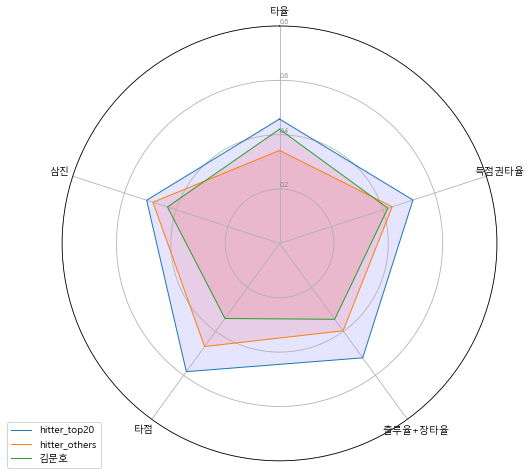

In [39]:
from math import pi

plt.figure(figsize=(15,8))
# Set data
df = pd.DataFrame({
'group': ['hitter_top20','hitter_therest','김문호'],
'타율': [0.457675, 0.341961,0.420213],
'득점권타율': [0.516255, 0.435815,0.418945],
'출루율+장타율': [0.520422, 0.397583,0.345161],
'타점': [0.583338, 0.469035,0.341549],
'삼진': [0.514030, 0.489690,0.433544]
})

# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=7)
plt.ylim(0,0.8)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="hitter_top20")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="hitter_others")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="김문호")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
